In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from datetime import datetime
from config import weather_api_key
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | faanui
Processing Record 2 of Set 1 | severobaykalsk
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | la asuncion
Processing Record 6 of Set 1 | lavrentiya
Processing Record 7 of Set 1 | toronto
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | quatre cocos
Processing Record 10 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 11 of Set 1 | davila
Processing Record 12 of Set 1 | nuevo progreso
Processing Record 13 of Set 1 | avarua
Processing Record 14 of Set 1 | arman
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | banjar
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | port-cartier
Processing Record 21 of Set 1 | thompson
Processing Record 22 of Set 1 | todos santos
P

Processing Record 38 of Set 4 | bambanglipuro
Processing Record 39 of Set 4 | ishikawa
Processing Record 40 of Set 4 | fershampenuaz
Processing Record 41 of Set 4 | gat
Processing Record 42 of Set 4 | sitka
Processing Record 43 of Set 4 | deputatskiy
Processing Record 44 of Set 4 | rawson
Processing Record 45 of Set 4 | ahipara
Processing Record 46 of Set 4 | magadan
Processing Record 47 of Set 4 | abu zabad
Processing Record 48 of Set 4 | sendafa
Processing Record 49 of Set 4 | male
Processing Record 50 of Set 4 | smithers
Processing Record 1 of Set 5 | adrar
Processing Record 2 of Set 5 | laizhou
Processing Record 3 of Set 5 | talnakh
Processing Record 4 of Set 5 | sabha
Processing Record 5 of Set 5 | ribeira brava
Processing Record 6 of Set 5 | oum hadjer
Processing Record 7 of Set 5 | yeppoon
Processing Record 8 of Set 5 | bantva
Processing Record 9 of Set 5 | alofi
Processing Record 10 of Set 5 | keuruu
Processing Record 11 of Set 5 | ilulissat
Processing Record 12 of Set 5 | vigr

Processing Record 31 of Set 8 | lewistown
Processing Record 32 of Set 8 | tura
Processing Record 33 of Set 8 | eggenstein-leopoldshafen
Processing Record 34 of Set 8 | tonj
Processing Record 35 of Set 8 | sioux lookout
Processing Record 36 of Set 8 | mezhdurechensk
Processing Record 37 of Set 8 | balaytigui
City not found. Skipping...
Processing Record 38 of Set 8 | los llanos de aridane
Processing Record 39 of Set 8 | puerto ayacucho
Processing Record 40 of Set 8 | port shepstone
Processing Record 41 of Set 8 | bonthe
Processing Record 42 of Set 8 | basco
Processing Record 43 of Set 8 | pangkalanbuun
Processing Record 44 of Set 8 | ancud
Processing Record 45 of Set 8 | manokwari
Processing Record 46 of Set 8 | kiunga
Processing Record 47 of Set 8 | ayna
Processing Record 48 of Set 8 | pokaran
Processing Record 49 of Set 8 | dakar
Processing Record 50 of Set 8 | hofn
Processing Record 1 of Set 9 | khandyga
Processing Record 2 of Set 9 | ambulu
Processing Record 3 of Set 9 | neyshabur
P

Processing Record 21 of Set 12 | srednekolymsk
Processing Record 22 of Set 12 | ballina
Processing Record 23 of Set 12 | beringovskiy
Processing Record 24 of Set 12 | mitchell
Processing Record 25 of Set 12 | hasaki
Processing Record 26 of Set 12 | andradina
Processing Record 27 of Set 12 | cascais
Processing Record 28 of Set 12 | talakan
Processing Record 29 of Set 12 | thinadhoo
Processing Record 30 of Set 12 | barabai
Processing Record 31 of Set 12 | santa maria del oro
Processing Record 32 of Set 12 | mongar
Processing Record 33 of Set 12 | souillac
Processing Record 34 of Set 12 | ostersund
Processing Record 35 of Set 12 | naze
Processing Record 36 of Set 12 | khash
Processing Record 37 of Set 12 | debre tabor
Processing Record 38 of Set 12 | tucdao
Processing Record 39 of Set 12 | xinmin
Processing Record 40 of Set 12 | sobolevo
Processing Record 41 of Set 12 | havelock
Processing Record 42 of Set 12 | metro
Processing Record 43 of Set 12 | ganganagar
Processing Record 44 of Set 

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Faanui,-16.48,-151.75,82.60,78,68,14.05,PF,2020-04-19 16:59:31
1,Severobaykalsk,55.65,109.32,14.95,80,6,9.62,RU,2020-04-19 16:59:32
2,Albany,42.60,-73.97,60.01,29,1,3.00,US,2020-04-19 16:59:32
3,Butaritari,3.07,172.79,83.07,75,14,12.50,KI,2020-04-19 16:59:32
4,La Asuncion,11.03,-63.86,84.20,74,57,16.11,VE,2020-04-19 16:59:32
5,Lavrentiya,65.58,-171.00,16.23,91,100,6.91,RU,2020-04-19 16:59:32
6,Toronto,43.70,-79.42,48.99,87,90,16.11,CA,2020-04-19 16:55:30
7,Busselton,-33.65,115.33,55.99,59,97,14.70,AU,2020-04-19 16:59:33
8,Quatre Cocos,-20.21,57.76,77.00,73,40,12.75,MU,2020-04-19 16:59:33
9,Davila,18.47,120.58,79.93,80,75,4.32,PH,2020-04-19 16:59:33


In [9]:
# Reorder columns
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Faanui,PF,2020-04-19 16:59:31,-16.48,-151.75,82.60,78,68,14.05
1,Severobaykalsk,RU,2020-04-19 16:59:32,55.65,109.32,14.95,80,6,9.62
2,Albany,US,2020-04-19 16:59:32,42.60,-73.97,60.01,29,1,3.00
3,Butaritari,KI,2020-04-19 16:59:32,3.07,172.79,83.07,75,14,12.50
4,La Asuncion,VE,2020-04-19 16:59:32,11.03,-63.86,84.20,74,57,16.11


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")

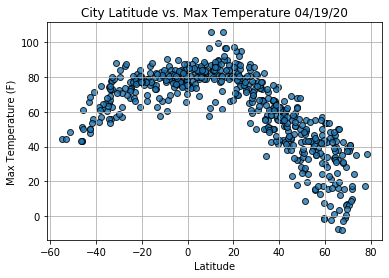

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

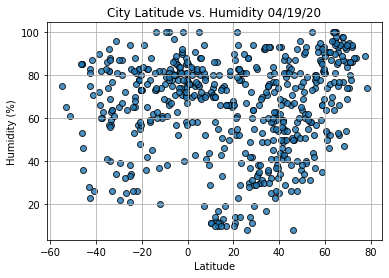

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

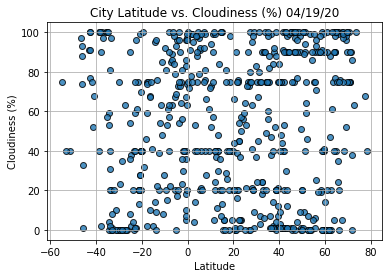

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

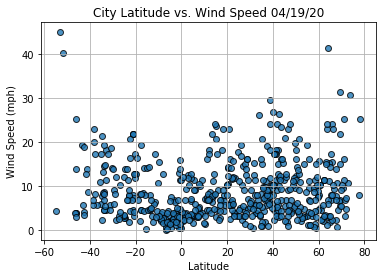

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                      Ushuaia
Country                        AR
Date          2020-04-19 16:59:34
Lat                         -54.8
Lng                         -68.3
Max Temp                     44.6
Humidity                       75
Cloudiness                     75
Wind Speed                   4.41
Name: 13, dtype: object

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

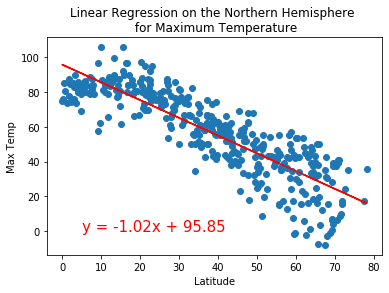

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(5,0))

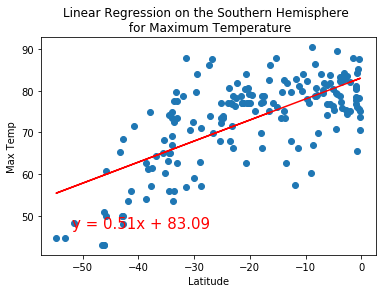

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-52,47))

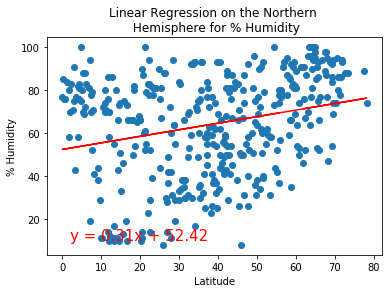

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern \n Hemisphere for % Humidity', '% Humidity',(2,10))

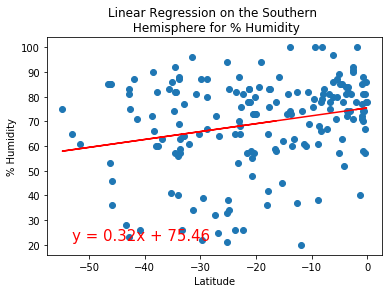

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern \n Hemisphere for % Humidity', '% Humidity',(-53,22))

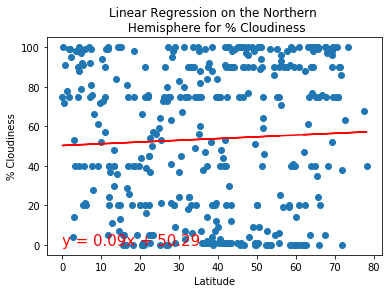

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern \n Hemisphere for % Cloudiness', '% Cloudiness',(0,0))

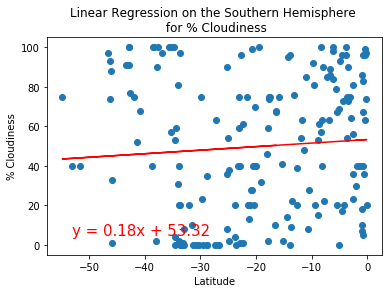

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-53,5))

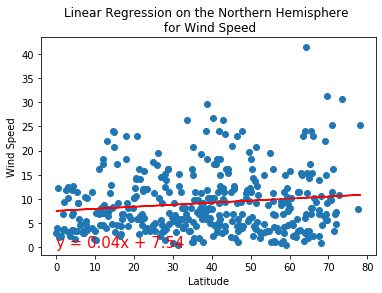

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(0,0))

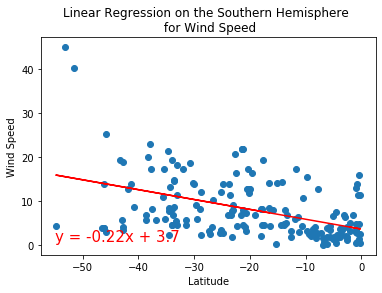

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-55,1))